In [24]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install openpyxl
!pip3 install -U scikit-learn scipy matplotlib

In [25]:
import pandas as pd 
import numpy as np
import seaborn as sns
import pickle

import re


In [26]:
df = pd.read_excel('Dataset_Hackathon.xlsx')
df.head()


,Country,Commodity,Flow,Quantity,Category,Volume (m^3),Distance from India (m),Frieght Cost (USD)
0,Albania,"Poultry cuts & offal, except livers, fresh or ...",Export,34,02_meat_and_edible_meat_offal,12,5940.830501,4840.697837
1,Albania,"Poultry cuts & offal, except livers, fresh or ...",Export,23,02_meat_and_edible_meat_offal,12,5940.830501,3069.710823
2,Albania,"Swine meat, salted/dried/smoked not ham/should...",Export,11,02_meat_and_edible_meat_offal,12,5940.830501,1475.822511
3,Albania,"Fowls, domestic, whole, frozen",Export,50,02_meat_and_edible_meat_offal,12,5940.830501,7083.948054
4,Albania,"Meat and edible offal nes fresh, chilled or fr...",Export,71,02_meat_and_edible_meat_offal,12,5940.830501,9976.560176


In [28]:
df.columns

Index(['Country', 'Commodity', 'Flow', 'Quantity', 'Category', 'Volume (m^3)',
       'Distance from India (m)', 'Frieght Cost (USD)'],
      dtype='object')

In [29]:
len(df['Country'].value_counts())

166

In [30]:
len(df['Commodity'].value_counts())

426

In [31]:
df['Flow'].value_counts()

Export       72361
Re-Export     9084
Name: Flow, dtype: int64

In [32]:
df['Category'].value_counts()

09_coffee_tea_mate_and_spices                             12231
07_edible_vegetables_and_certain_roots_and_tubers          9160
03_fish_crustaceans_molluscs_aquatic_invertebrates_ne      8608
08_edible_fruit_nuts_peel_of_citrus_fruit_melons           8030
11_milling_products_malt_starches_inulin_wheat_glute       7908
12_oil_seed_oleagic_fruits_grain_seed_fruit_etc_ne         7163
04_dairy_products_eggs_honey_edible_animal_product_nes     7157
02_meat_and_edible_meat_offal                              6912
05_products_of_animal_origin_nes                           5223
10_cereals                                                 5040
06_live_trees_plants_bulbs_roots_cut_flowers_etc           4013
Name: Category, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81445 entries, 0 to 81444
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  81445 non-null  object 
 1   Commodity                81445 non-null  object 
 2   Flow                     81445 non-null  object 
 3   Quantity                 81445 non-null  int64  
 4   Category                 81445 non-null  object 
 5   Volume (m^3)             81445 non-null  int64  
 6   Distance from India (m)  81445 non-null  float64
 7   Frieght Cost (USD)       81445 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


In [34]:
df = df.drop('Commodity', axis = 1)
df = df.drop('Country', axis = 1)
df = df.drop('Flow', axis=1)
df = df.drop('Category', axis=1)

In [35]:
df.head()

,Quantity,Volume (m^3),Distance from India (m),Frieght Cost (USD)
0,34,12,5940.830501,4840.697837
1,23,12,5940.830501,3069.710823
2,11,12,5940.830501,1475.822511
3,50,12,5940.830501,7083.948054
4,71,12,5940.830501,9976.560176


<AxesSubplot: >

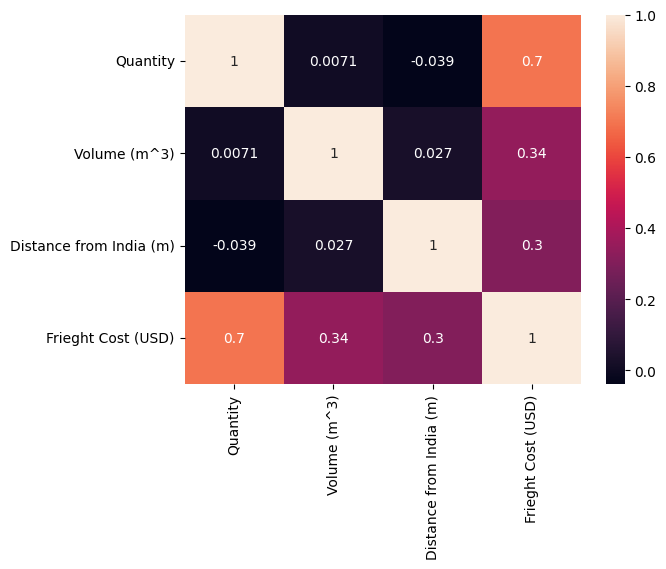

In [36]:
df_corr = df.corr()
sns.heatmap(df_corr, annot = True)

In [37]:
df.columns

Index(['Quantity', 'Volume (m^3)', 'Distance from India (m)',
       'Frieght Cost (USD)'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81445 entries, 0 to 81444
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Quantity                 81445 non-null  int64  
 1   Volume (m^3)             81445 non-null  int64  
 2   Distance from India (m)  81445 non-null  float64
 3   Frieght Cost (USD)       81445 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 2.5 MB


In [39]:
X = df[['Quantity','Volume (m^3)',
       'Distance from India (m)', #'Frieght Cost (USD)'
]]
y = df['Frieght Cost (USD)']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [79]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000, learning_rate=0.01)

# from sklearn.linear_model import LinearRegression
# model = LinearRegression()


In [88]:
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.9982916063343865

In [89]:
pickle.dump(model, open('modell.pkl','wb'))

In [90]:
from pickle import load
filename = 'modell.pkl'
loaded_model = load(open(filename, 'rb'))


In [91]:
fv = [34,12,5940.830501]
fv = np.array(fv).reshape((1,-1))
prediction=loaded_model.predict(fv)

prediction

array([4954.4937], dtype=float32)